# *`Timeseries Forecasting Models`*


---

# *Name*: `OKETA AGGREY`
## `Data Analyst`
### *Gmail*:oketaaggrey@gmail.com

---


*`Importing Libraries`*

In [16]:
#  General Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Machine learning libraries
import statsmodels.api as sm      
import statsmodels.formula.api as smf 

# Timeseries and forecasting libraries
from statsmodels.tsa.arima.model import ARIMA        
from statsmodels.tsa.api import VAR                  
from statsmodels.tsa.api import VECM                 
from statsmodels.tsa.ardl import ARDL                
from statsmodels.tsa.api import ExponentialSmoothing 
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Libraries for  statisticaltools
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf 
from statsmodels.tsa.stattools import adfuller,grangercausalitytests 
from sklearn.metrics import mean_absolute_error, mean_squared_error 
from statsmodels.tsa.vector_ar.vecm import coint_johansen

# Visualisation
plt.style.use('ggplot')
%matplotlib inline


import warnings
warnings.filterwarnings('ignore')

In [17]:
# importing train data
df=pd.read_csv('DailyClimateTrain.csv',parse_dates=['date'],index_col='date')
df.head()

,meantemp,humidity,wind_speed,meanpressure
date,,,,
2013-01-01,10.000000,84.500000,0.000000,1015.666667
2013-01-02,7.400000,92.000000,2.980000,1017.800000
2013-01-03,7.166667,87.000000,4.633333,1018.666667
2013-01-04,8.666667,71.333333,1.233333,1017.166667
2013-01-05,6.000000,86.833333,3.700000,1016.500000


In [18]:
# importing test data
df2=pd.read_csv('DailyClimateTest.csv',parse_dates=['date'],index_col='date')
df2.head()

,meantemp,humidity,wind_speed,meanpressure
date,,,,
2017-01-01,15.913043,85.869565,2.743478,59.000000
2017-01-02,18.500000,77.222222,2.894444,1018.277778
2017-01-03,17.111111,81.888889,4.016667,1018.333333
2017-01-04,18.700000,70.050000,4.545000,1015.700000
2017-01-05,18.388889,74.944444,3.300000,1014.333333


In [19]:
# Exploratory data analysis
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1461 entries, 2013-01-01 to 2016-12-31
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   meantemp      1461 non-null   float64
 1   humidity      1461 non-null   float64
 2   wind_speed    1461 non-null   float64
 3   meanpressure  1461 non-null   float64
dtypes: float64(4)
memory usage: 57.1 KB


In [20]:
# Descriptive statistics
df.describe()

,meantemp,humidity,wind_speed,meanpressure
count,1461.000000,1461.000000,1461.000000,1461.000000
mean,25.506127,60.744851,6.806865,1011.101197
std,7.339416,16.743928,4.559688,180.293335
min,6.000000,13.428571,0.000000,-3.041667
25%,18.857143,50.375000,3.475000,1001.571429
50%,27.714286,62.625000,6.250000,1008.555556
75%,31.312500,72.125000,9.250000,1014.937500
max,38.714286,98.000000,42.220000,7679.333333


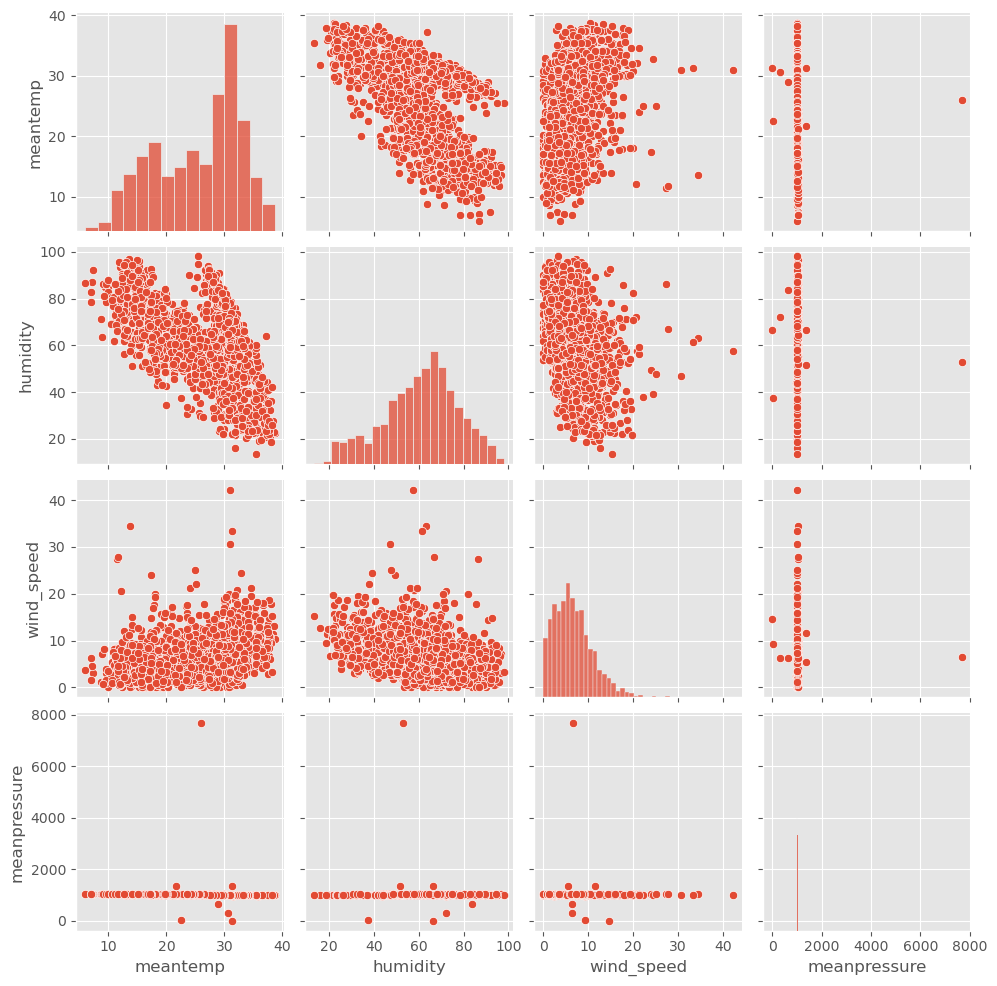

In [14]:
sns.pairplot(df)

In [22]:
corr=df.corr()

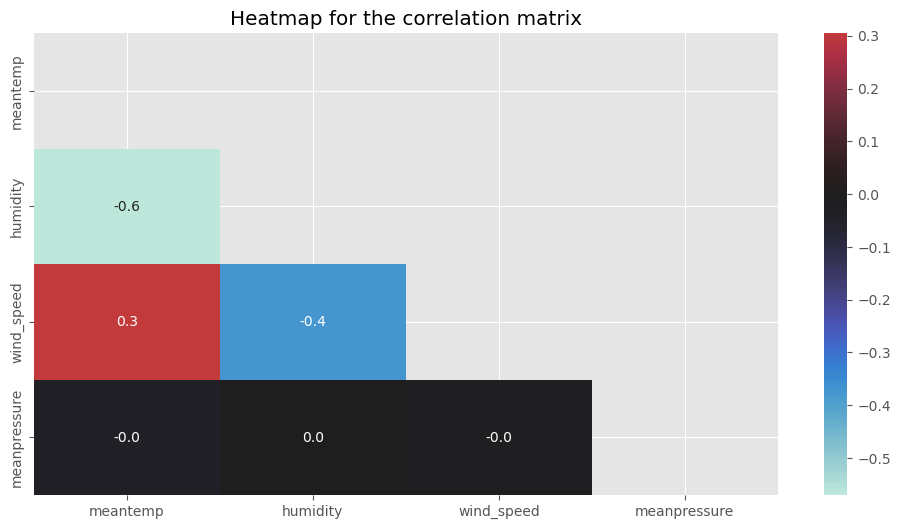

In [23]:
mask=np.triu(np.ones_like(corr,dtype=bool))
plt.figure(figsize=(12,6))
sns.heatmap(corr,mask=mask,annot=True,fmt='.1f',center=0)
plt.title('Heatmap for the correlation matrix')
plt.savefig('Correlation matrix')
plt.show()

*`Data Transformation`*

In [24]:
df= df.resample('M').mean()
for  col in df.columns:
    df[col]=np.log(df[col])
df.head()    
    

,meantemp,humidity,wind_speed,meanpressure
date,,,,
2013-01-31,2.491118,4.290854,1.575656,6.925446
2013-02-28,2.825392,4.275812,2.011442,6.923575
2013-03-31,3.127384,4.050345,2.169884,6.919421
2013-04-30,3.363673,3.544203,2.085223,6.914028
2013-05-31,3.519773,3.365164,2.190922,6.907679


In [25]:
df.isnull().sum()

meantemp        0
humidity        0
wind_speed      0
meanpressure    0
dtype: int64

In [26]:
df2= df2.resample('M').mean()
for  col in df2.columns:
    df2[col]=np.log(df2[col])
df2.head()

,meantemp,humidity,wind_speed,meanpressure
date,,,,
2017-01-31,2.754353,4.346247,1.968926,6.894435
2017-02-28,2.909629,4.164737,2.023703,6.923209
2017-03-31,3.167741,3.871403,2.184295,6.918170
2017-04-30,3.426009,3.414712,2.211396,6.912310


In [27]:
df2.isnull().sum()

meantemp        0
humidity        0
wind_speed      0
meanpressure    0
dtype: int64

# *`Univariate Timeseries Analysis (Humidity)`*

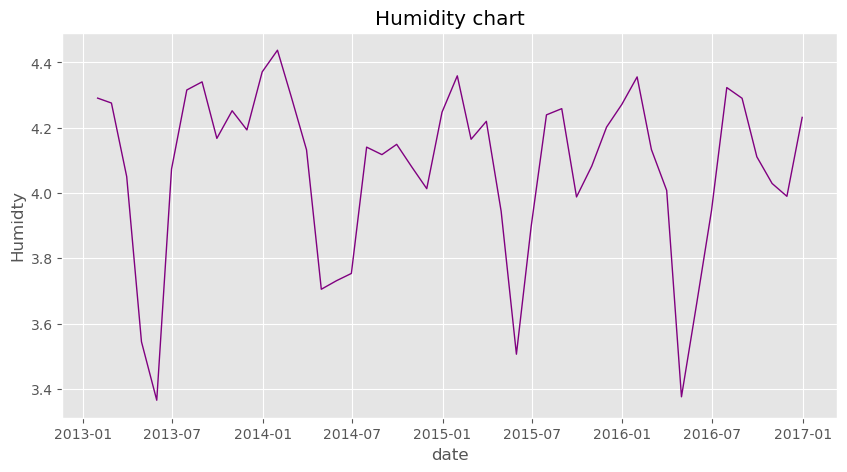

In [28]:
plt.figure(figsize=(10,5))
plt.plot(df.index,df.humidity,color='purple',linewidth=1)
plt.title('Humidity chart')
plt.xlabel('date')
plt.ylabel('Humidty')
plt.savefig('Humidity chart')

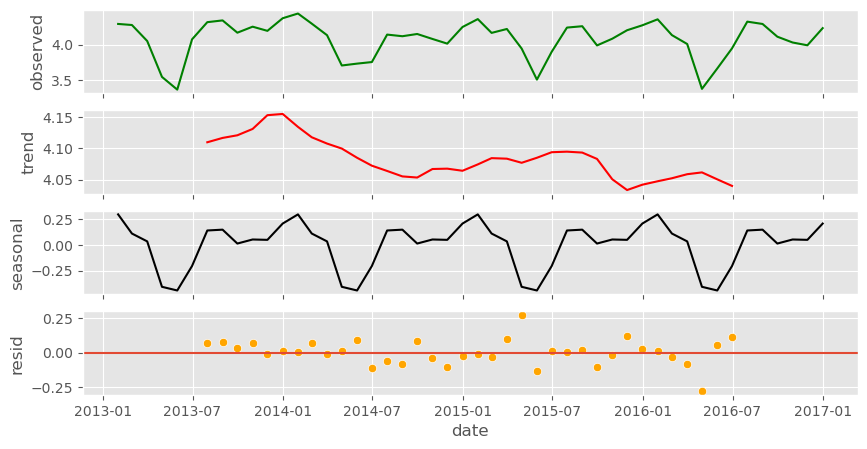

In [29]:
# seasonal decomposition
dec=seasonal_decompose(df.humidity,model='additive')
fig,axs=plt.subplots(4,1,figsize=(10,5),sharex=True)
axs[0].plot(dec.observed,color='green')
axs[0].set_ylabel('observed')
axs[1].plot(dec.trend,color='red')
axs[1].set_ylabel('trend')
axs[2].plot(dec.seasonal,color='black')
axs[2].set_ylabel('seasonal')

sns.scatterplot(dec.resid,color='orange',ax=axs[3])
axs[3].axhline(0)
axs[3].set_ylabel('resid')
plt.savefig('seasonal decomposition')
plt.show()


# *`Trend Analysis`*

In [30]:
df_t=df.copy()
df_t['trend']=dec.trend
df_t=df_t.dropna()
df_t.head()

,meantemp,humidity,wind_speed,meanpressure,trend
date,,,,,
2013-07-31,3.423076,4.315799,1.995883,6.905132,4.109481
2013-08-31,3.386008,4.340646,1.999363,6.908195,4.116398
2013-09-30,3.395870,4.167483,2.027283,6.911697,4.120616
2013-10-31,3.263053,4.252140,1.042433,6.917556,4.130740
2013-11-30,2.934479,4.193374,1.447446,6.922992,4.152713


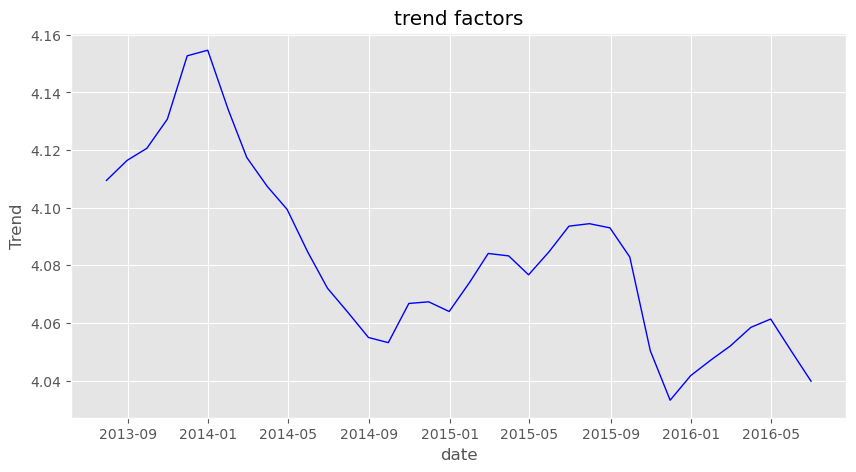

In [31]:
plt.figure(figsize=(10,5))
plt.plot(df_t.index,df_t.trend,color='blue',linewidth=1)
plt.title('trend factors')
plt.xlabel('date')
plt.ylabel('Trend')
plt.savefig('Trend chart')

In [32]:
# Testing for stationality
def dfuller(s):
    j=adfuller(s)
    print(f'statistic: {j[0]:.4f}')
    print(f'pvalue: {j[1]:.4f}')
    print(f'degrees of freedom: {j[2]:.4f}')
    if j[1]<0.05:
        print('There is stationality')
    else:
        print('No stationality')    
    
    
    

In [33]:
dfuller(df_t.trend)

statistic: -2.3539
pvalue: 0.1552
degrees of freedom: 4.0000
No stationality


# *`Trend models`*

                            OLS Regression Results                            
Dep. Variable:                  trend   R-squared:                       0.586
Model:                            OLS   Adj. R-squared:                  0.574
Method:                 Least Squares   F-statistic:                     48.15
Date:                Sat, 09 Nov 2024   Prob (F-statistic):           5.34e-08
Time:                        13:32:18   Log-Likelihood:                 89.566
No. Observations:                  36   AIC:                            -175.1
Df Residuals:                      34   BIC:                            -172.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.1228      0.007    610.420      0.0

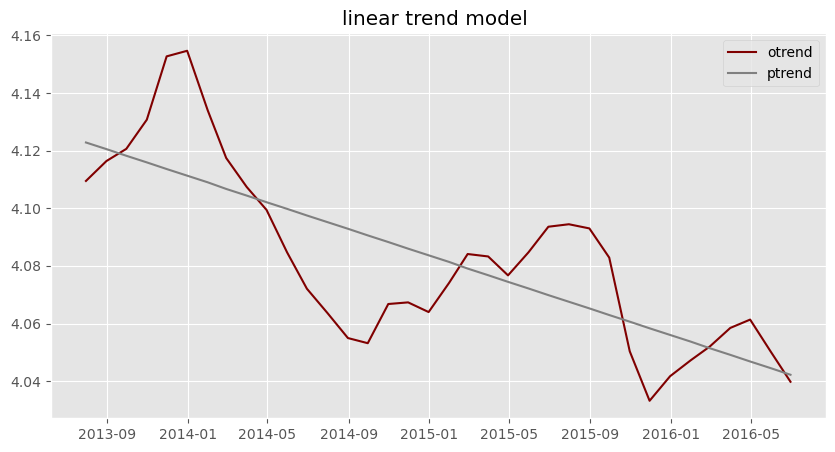

In [34]:
# Linear Model
t=np.arange(len(df_t))
y=df_t.trend
x=sm.add_constant(t)
model=sm.OLS(y,x).fit()
print(model.summary())
e=model.predict(x)
plt.figure(figsize=(10,5)) 
plt.plot(df_t.index,df_t.trend,color='maroon',label='otrend')
plt.plot(df_t.index,e,color='grey',label='ptrend')
plt.title('linear trend model ')
plt.legend()
plt.savefig('Linear trend model')
plt.show()

                            OLS Regression Results                            
Dep. Variable:                  trend   R-squared:                       0.587
Model:                            OLS   Adj. R-squared:                  0.574
Method:                 Least Squares   F-statistic:                     48.26
Date:                Sat, 09 Nov 2024   Prob (F-statistic):           5.22e-08
Time:                        13:32:21   Log-Likelihood:                 140.31
No. Observations:                  36   AIC:                            -276.6
Df Residuals:                      34   BIC:                            -273.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.4165      0.002    858.697      0.0

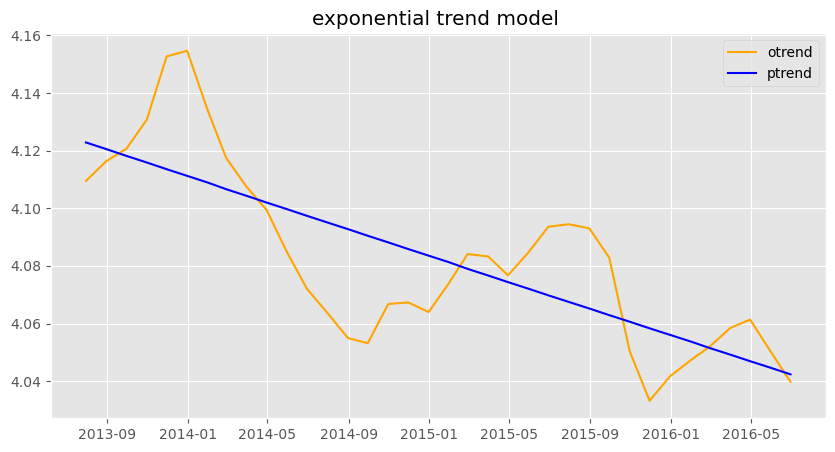

In [35]:
# Exponential trend model
t=np.arange(len(df_t))
y=np.log(df_t.trend)
x=sm.add_constant(t)
model_1=sm.OLS(y,x).fit()
print(model_1.summary())
e=model_1.predict(x)
e=np.exp(e)
plt.figure(figsize=(10,5)) 
plt.plot(df_t.index,df_t.trend,color='orange',label='otrend')
plt.plot(df_t.index,e,color='blue',label='ptrend')
plt.title('exponential trend model ')
plt.legend()
plt.savefig('exponential trend model')
plt.show()

                            OLS Regression Results                            
Dep. Variable:                  trend   R-squared:                       0.613
Model:                            OLS   Adj. R-squared:                  0.589
Method:                 Least Squares   F-statistic:                     26.08
Date:                Sat, 09 Nov 2024   Prob (F-statistic):           1.61e-07
Time:                        13:32:24   Log-Likelihood:                 90.753
No. Observations:                  36   AIC:                            -175.5
Df Residuals:                      33   BIC:                            -170.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.1333      0.010    429.709      0.0

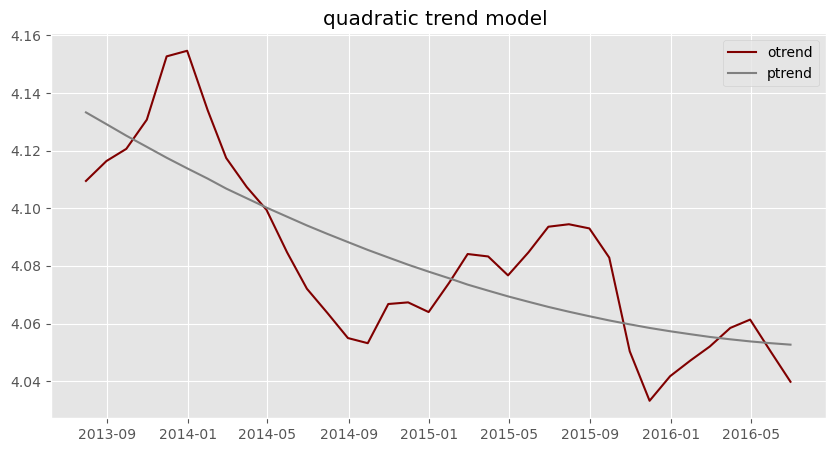

In [36]:
t=np.arange(len(df_t))
t2=t**2
y=df_t.trend
x=sm.add_constant(np.column_stack((t,t2)))
model_2=sm.OLS(y,x).fit()
print(model_2.summary())
e=model_2.predict(x)
plt.figure(figsize=(10,5)) 
plt.plot(df_t.index,df_t.trend,color='maroon',label='otrend')
plt.plot(df_t.index,e,color='grey',label='ptrend')
plt.title('quadratic trend model ')
plt.legend()
plt.savefig('quadratic trend model')
plt.show()

# *`Analysis Of Seasonality`*

In [37]:
df_s=df.copy()
df_s['seasonal']=dec.seasonal
df_s=df_s.dropna()
df_s.head()

,meantemp,humidity,wind_speed,meanpressure,seasonal
date,,,,,
2013-01-31,2.491118,4.290854,1.575656,6.925446,0.296572
2013-02-28,2.825392,4.275812,2.011442,6.923575,0.110681
2013-03-31,3.127384,4.050345,2.169884,6.919421,0.034481
2013-04-30,3.363673,3.544203,2.085223,6.914028,-0.406665
2013-05-31,3.519773,3.365164,2.190922,6.907679,-0.442352


In [38]:
df_s['year']=df_s.index.year
df_s['quarter']=df_s.index.quarter
df_s.head(12)

,meantemp,humidity,wind_speed,meanpressure,seasonal,year,quarter
date,,,,,,,
2013-01-31,2.491118,4.290854,1.575656,6.925446,0.296572,2013,1
2013-02-28,2.825392,4.275812,2.011442,6.923575,0.110681,2013,1
2013-03-31,3.127384,4.050345,2.169884,6.919421,0.034481,2013,1
2013-04-30,3.363673,3.544203,2.085223,6.914028,-0.406665,2013,2
2013-05-31,3.519773,3.365164,2.190922,6.907679,-0.442352,2013,2
2013-06-30,3.480651,4.073430,2.261130,6.905161,-0.204788,2013,2
2013-07-31,3.423076,4.315799,1.995883,6.905132,0.140313,2013,3
2013-08-31,3.386008,4.340646,1.999363,6.908195,0.148360,2013,3
2013-09-30,3.395870,4.167483,2.027283,6.911697,0.013529,2013,3


In [39]:
anova=smf.ols('seasonal~C(quarter)+C(year)+C(quarter):C(year)',data=df_s).fit()
r=sm.stats.anova_lm(anova)
print(r)

                      df        sum_sq       mean_sq             F  \
C(quarter)           3.0  1.990637e+00  6.635458e-01  5.476037e+01   
C(year)              3.0  8.762981e-33  2.920994e-33  2.410605e-31   
C(quarter):C(year)   9.0  1.744652e-31  1.938502e-32  1.599785e-30   
Residual            32.0  3.877524e-01  1.211726e-02           NaN   

                          PR(>F)  
C(quarter)          1.058408e-12  
C(year)             1.000000e+00  
C(quarter):C(year)  1.000000e+00  
Residual                     NaN  


Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
     1      2  -0.4985    0.0 -0.6008 -0.3962   True
     1      3  -0.0465 0.6217 -0.1488  0.0558  False
     1      4   -0.044 0.6629 -0.1463  0.0584  False
     2      3    0.452    0.0  0.3497  0.5543   True
     2      4   0.4546    0.0  0.3522  0.5569   True
     3      4   0.0026 0.9999 -0.0998  0.1049  False
----------------------------------------------------


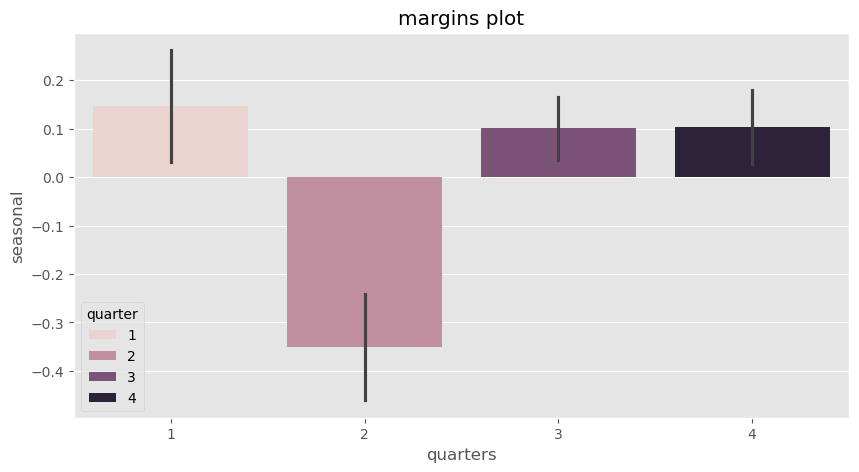

In [40]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
post=pairwise_tukeyhsd(endog=df_s.seasonal,groups=df_s.quarter,alpha=0.05)
print(post)
plt.figure(figsize=(10,5))
sns.barplot(data=df_s,x='quarter',y='seasonal',estimator=np.mean,ci='sd',hue='quarter')
plt.title('margins plot')
plt.xlabel('quarters')
plt.ylabel('seasonal')
plt.savefig('margins')
plt.show()

 # Exponential smoothing

In [42]:
train=df
test=df2
smooth=ExponentialSmoothing(train['humidity'], trend='add', seasonal='add',seasonal_periods=12)
smooth=smooth.fit()
print(smooth.summary())

                       ExponentialSmoothing Model Results                       
Dep. Variable:                 humidity   No. Observations:                   48
Model:             ExponentialSmoothing   SSE                              0.496
Optimized:                         True   AIC                           -187.497
Trend:                         Additive   BIC                           -157.558
Seasonal:                      Additive   AICC                          -163.911
Seasonal Periods:                    12   Date:                 Sat, 09 Nov 2024
Box-Cox:                          False   Time:                         13:47:55
Box-Cox Coeff.:                    None                                         
                          coeff                 code              optimized      
---------------------------------------------------------------------------------
smoothing_level              1.4901e-08                alpha                 True
smoothing_trend          

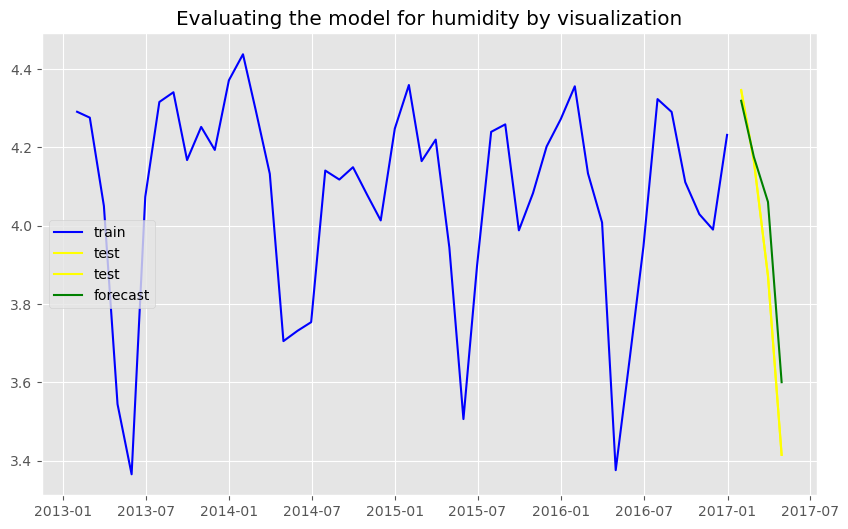

In [ ]:
steps=len(test)
forecast=smooth.forecast(steps=steps)
plt.figure(figsize=(10,6))
plt.plot(train.index,train.humidity,color='blue',label='train')
plt.plot(test.index,test.humidity,test.humidity,color='yellow',label='test')
plt.plot(test.index,forecast, color='green',label='forecast')
plt.legend()
plt.title('Evaluating the model for humidity by visualization')
plt.savefig("humidity model evaluation")
plt.show()


In [57]:
mab=mean_absolute_error(test.humidity,forecast)
mse=mean_squared_error(test.humidity,forecast)
print(f"MAE:{mab:3f}")
print(f"MSF:{mse:3f}")


MAE:0.103163
MSF:0.017774


In [ ]:
dt=pd.date_range (start=train.index[-1] + pd.DateOffset(months=1) ,periods=steps,freq='M')
forecast_df=pd.DataFrame ("humidity":forecast})
forecast_df.to_csv("Humidity Forecasted Data")

SyntaxError: closing parenthesis '}' does not match opening parenthesis '(' (1021154611.py, line 2)

In [67]:
dfuller(df['humidity'].diff(12).dropna())

statistic: -5.2504
pvalue: 0.0000
degrees of freedom: 0.0000
There is stationality


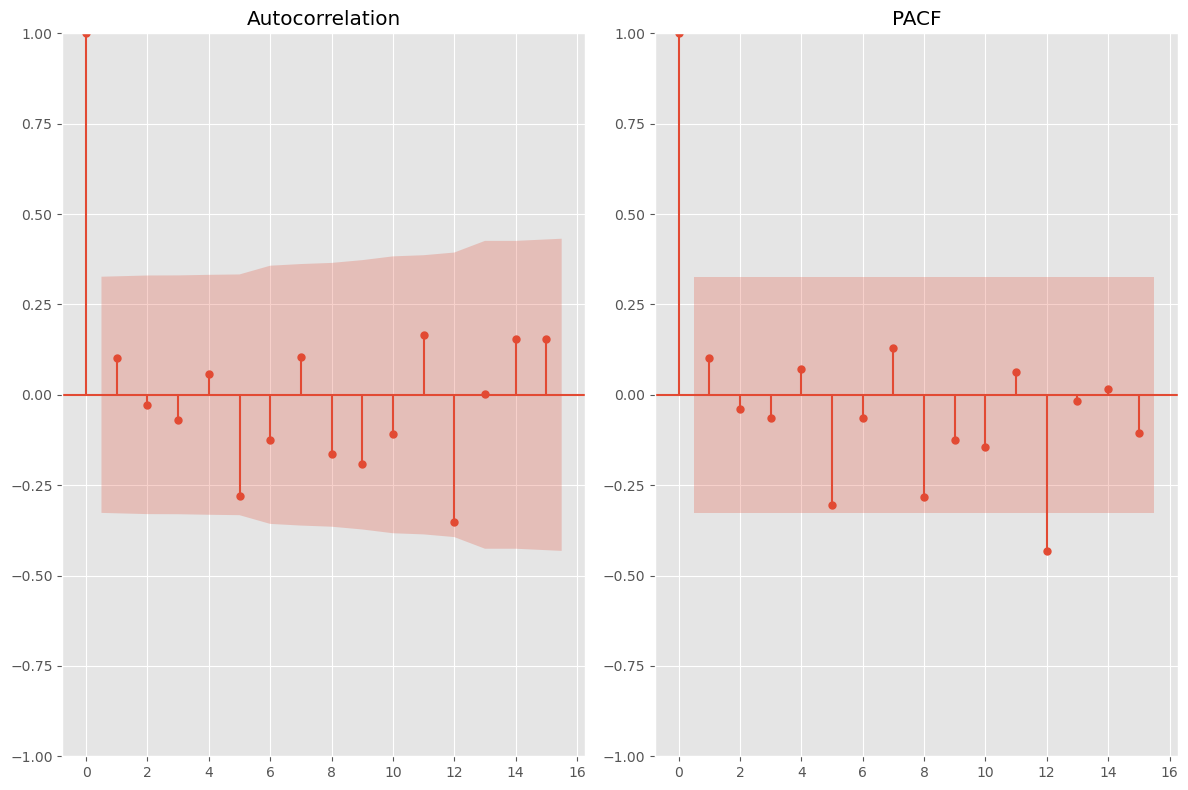

In [78]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(12,8))
# ACF
plot_acf(df['humidity'].diff(12).dropna(), lags=15,ax=ax1)
# PACF
plot_pacf(df['humidity'].diff(12).dropna(),lags=15,ax= ax2)
plt.title('PACF')
plt.tight_layout()
plt.show()

In [80]:
S=SARIMAX(df['humidity'],order=(0,0,0), seasonal_order=(1,1,0,12)).fit()
print(S.summary())

                                SARIMAX Results                                 
Dep. Variable:                 humidity   No. Observations:                   48
Model:             SARIMAX(1, 1, 0, 12)   Log Likelihood                  15.429
Date:                  Sat, 09 Nov 2024   AIC                            -26.858
Time:                          15:46:40   BIC                            -23.691
Sample:                      01-31-2013   HQIC                           -25.753
                           - 12-31-2016                                         
Covariance Type:                    opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12      -0.6158      0.170     -3.613      0.000      -0.950      -0.282
sigma2         0.0212      0.005      4.144      0.000       0.011       0.031
Ljung-Box (L1) (Q):                 

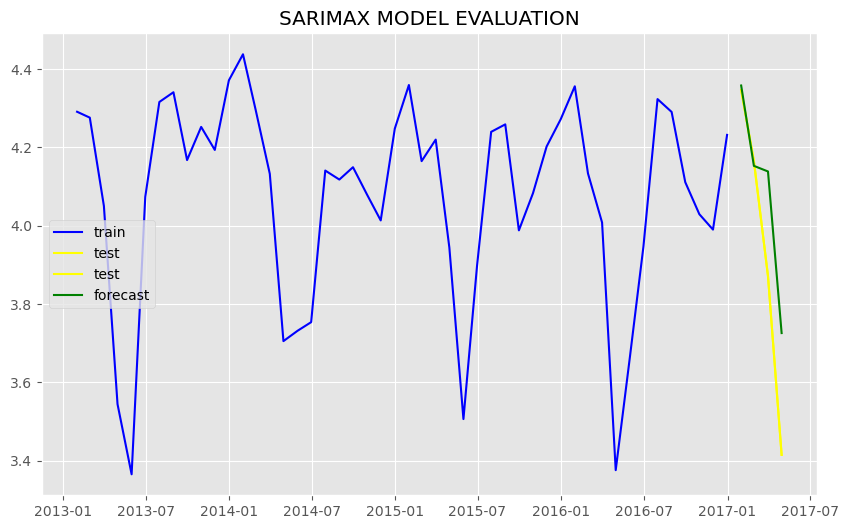

In [83]:
steps=len(test)
forecast=S.forecast(steps=steps)
plt.figure(figsize=(10,6))
plt.plot(train.index,train.humidity,color='blue',label='train')
plt.plot(test.index,test.humidity,test.humidity,color='yellow',label='test')
plt.plot(test.index,forecast, color='green',label='forecast')
plt.legend()
plt.title('SARIMAX MODEL EVALUATION')
plt.savefig("SARIMAX MODEL EVALUATION")
plt.show()
